### Bias-Variance Tradeoff Analysis 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

In [2]:
# Generate dataset 
X = np.linspace(-2, 2, 100).reshape(-1, 1) 
y = X**3 - 0.5 * X + np.random.normal(0, 0.2, X.shape)

In [5]:
# Function to compute bias and variance 
def bias_var_analysis(degree): 
    poly = PolynomialFeatures(degree=degree) 
    X_poly = poly.fit_transform(X) 
    model = LinearRegression() 
    model.fit(X_poly, y) 
    y_pred = model.predict(X_poly)

    # Visualization 
    plt.scatter(X, y, color='blue', alpha=0.5, label="Data") 
    plt.plot(X, y_pred, label=f"Degree {degree}")

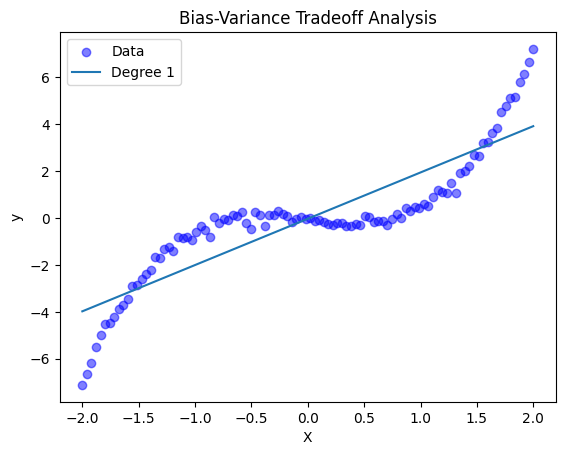

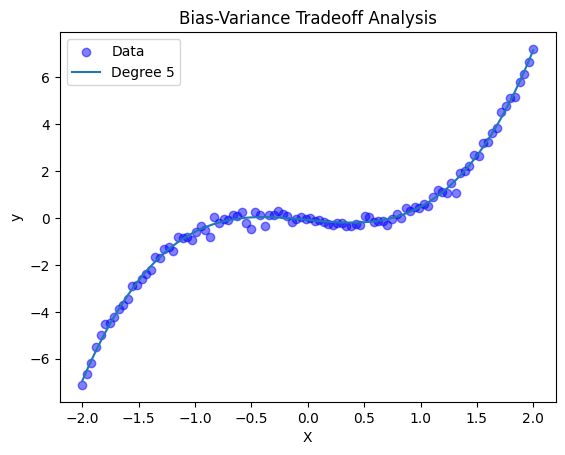

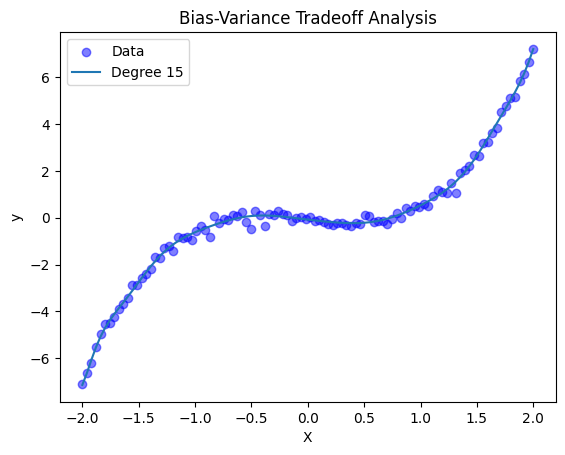

In [6]:
# Plot models for different degrees 
for d in [1, 5, 15]: 
    bias_var_analysis(d) 
    plt.xlabel("X") 
    plt.ylabel("y") 
    plt.title("Bias-Variance Tradeoff Analysis") 
    plt.legend() 
    plt.show()